In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())
print("\nColumn Info:\n")
df.info()
print("\nDescriptive Statistics (Numerical):\n", df.describe())

Dataset Shape: (7043, 21)

First 5 Rows:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Stream

In [6]:
print("\nMissing Values (%):\n", (df.isnull().sum() / len(df)) * 100)
# Note: 'TotalCharges' might appear non-missing but contain spaces. Check data types.
# Convert 'TotalCharges' to numeric, coercing errors (spaces become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("\nMissing Values after TotalCharges conversion (%):\n", (df.isnull().sum() / len(df)) * 100)


Missing Values (%):
 customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

Missing Values after TotalCharges conversion (%):
 customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup

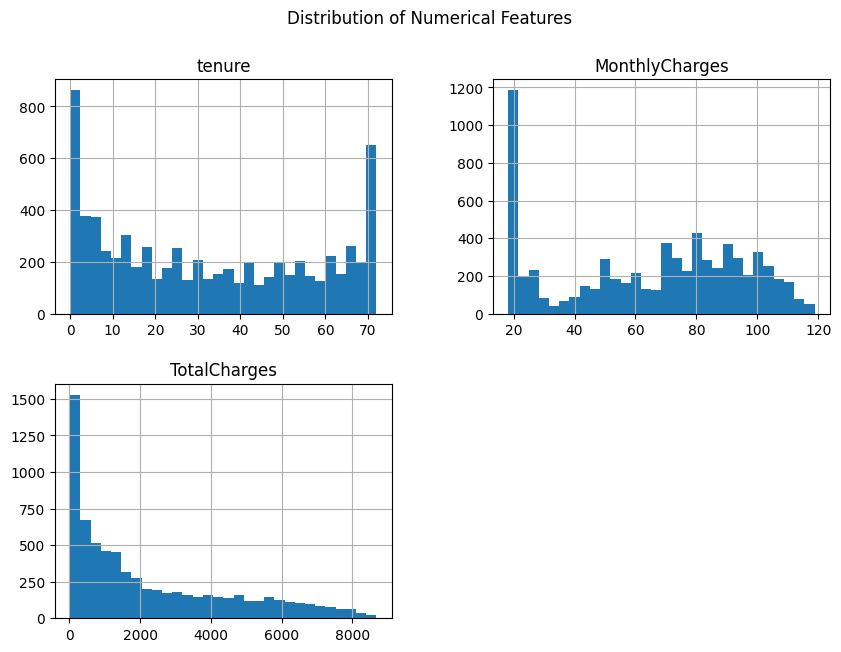

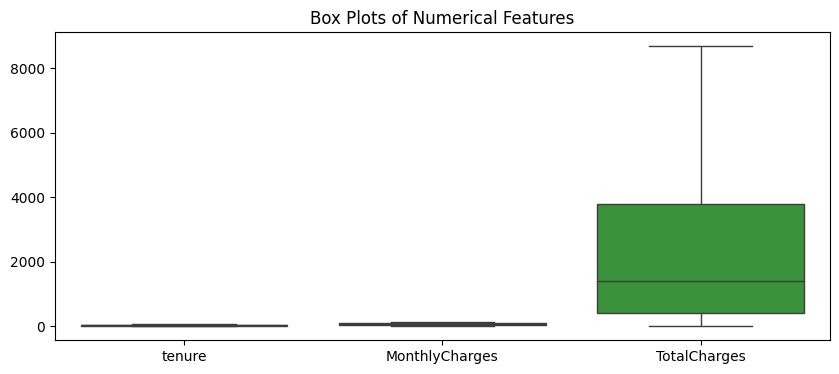

In [7]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features].hist(bins=30, figsize=(10, 7))
plt.suptitle("Distribution of Numerical Features")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=df[numerical_features])
plt.title("Box Plots of Numerical Features")
plt.show()

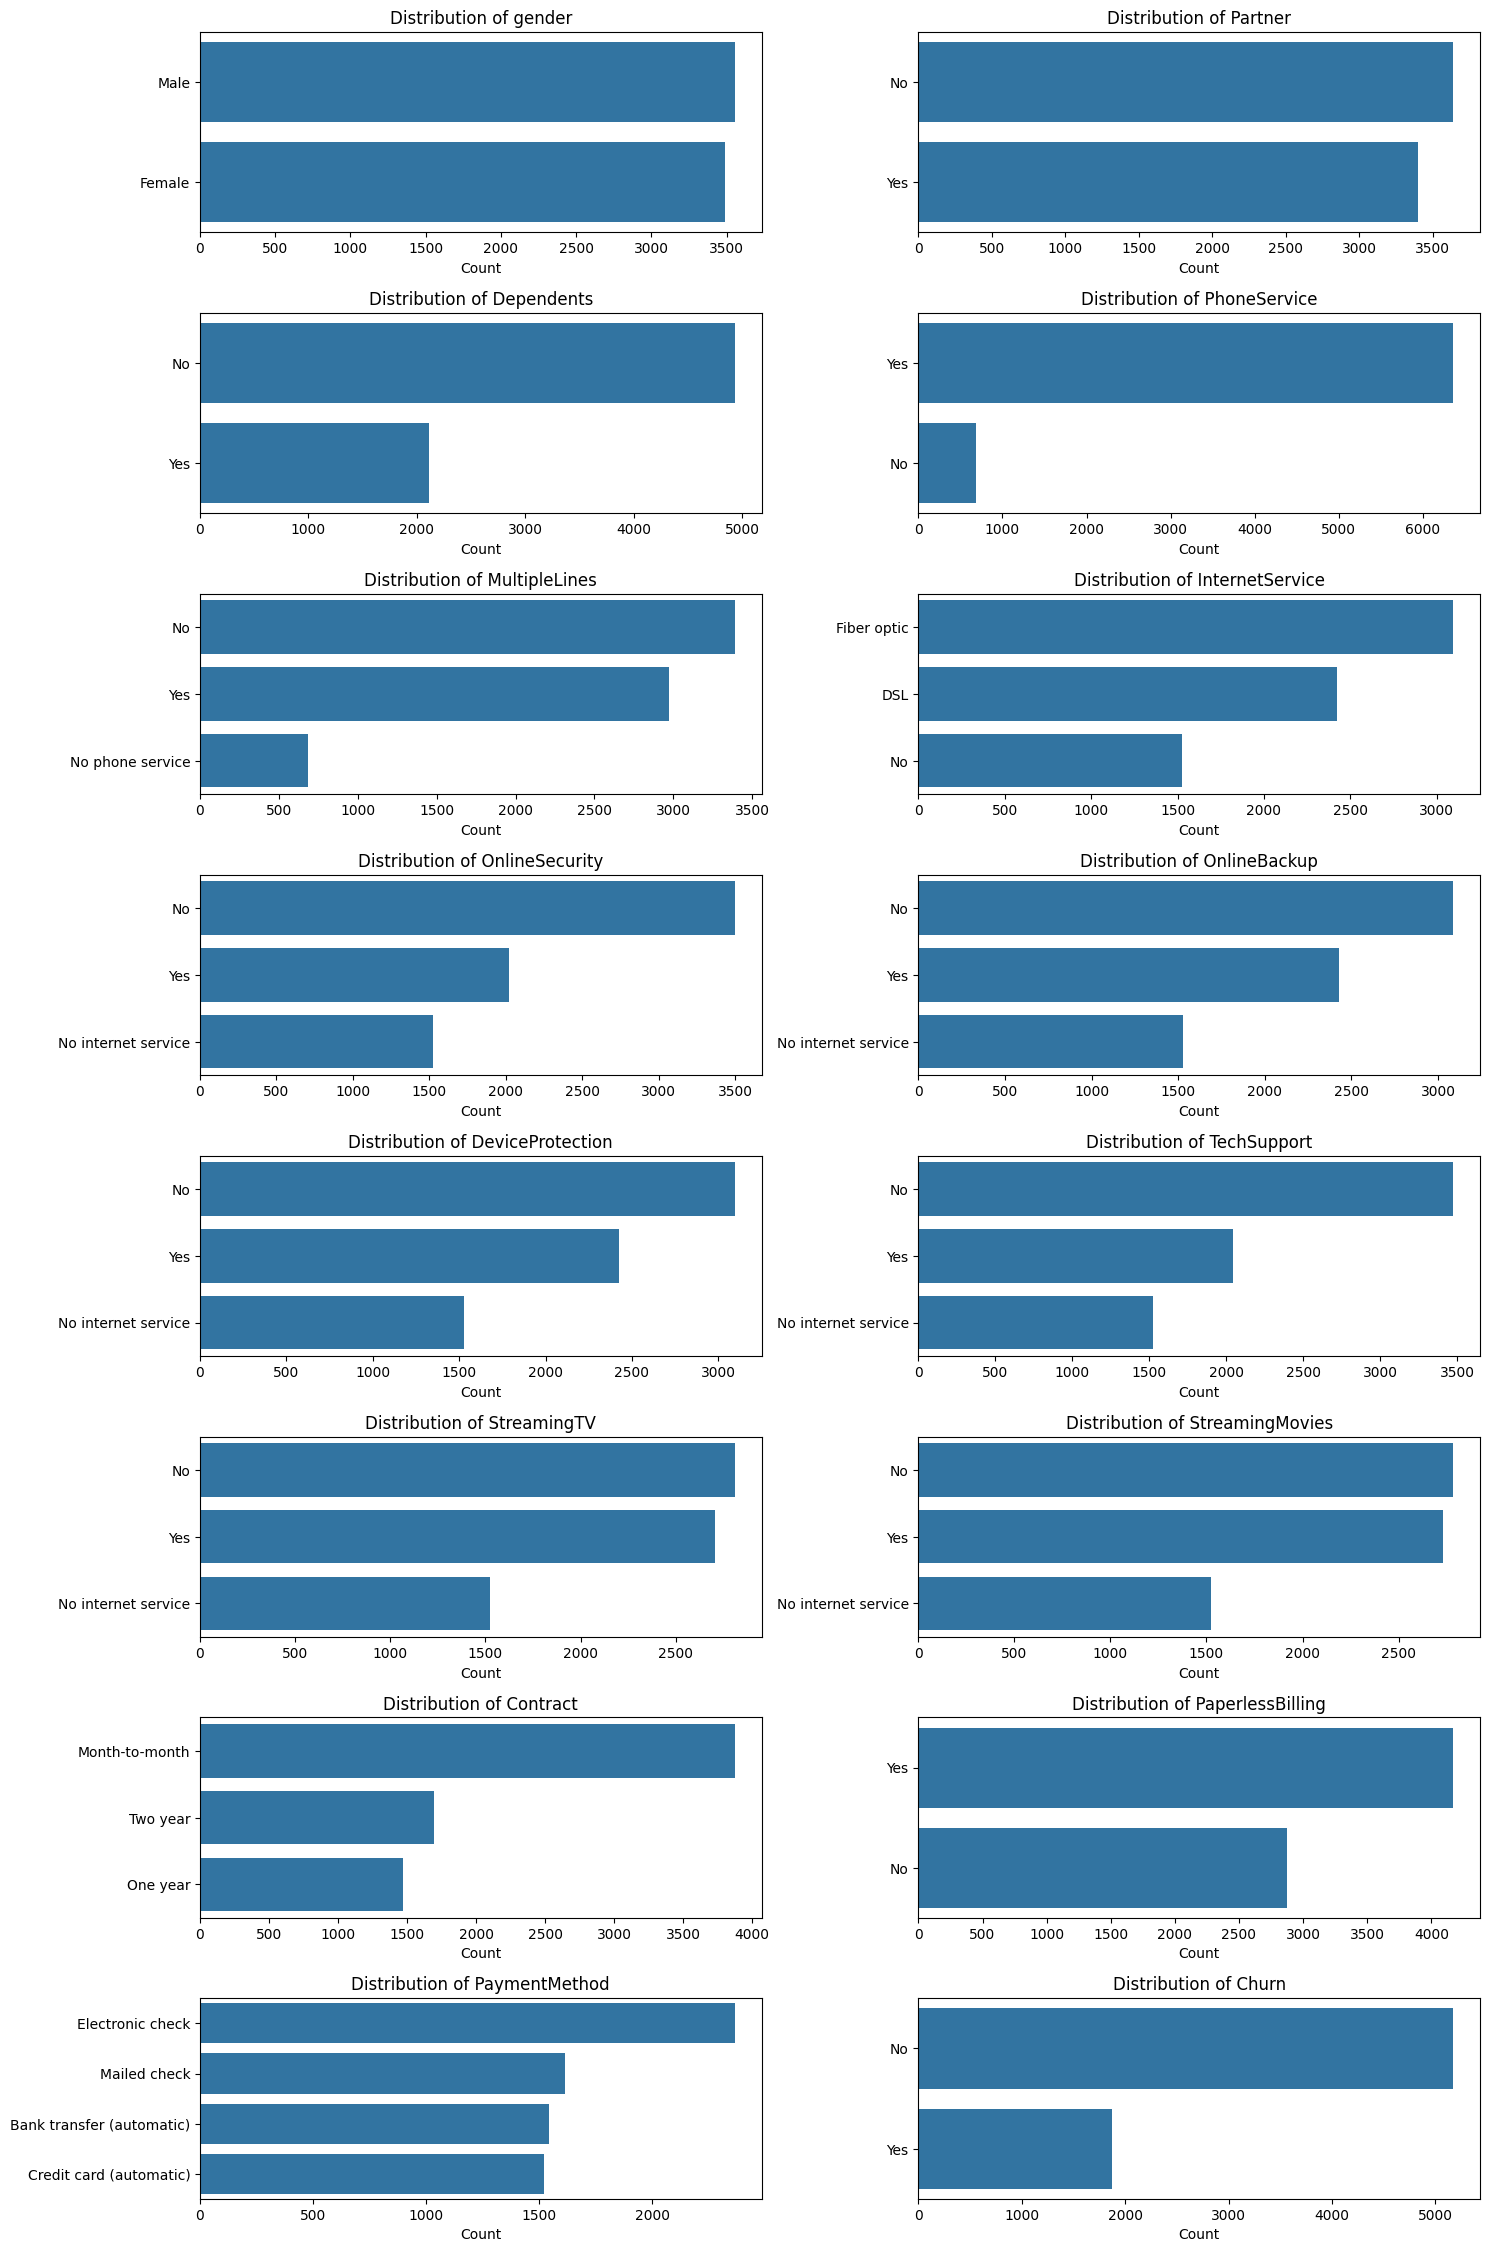

In [8]:
categorical_features = df.select_dtypes(include='object').columns.drop('customerID') # Exclude ID
plt.figure(figsize=(15, 25)) # Adjust figsize as needed
for i, col in enumerate(categorical_features):
    plt.subplot(len(categorical_features)//2 + 1, 2, i+1)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel('')
plt.tight_layout()
plt.show()

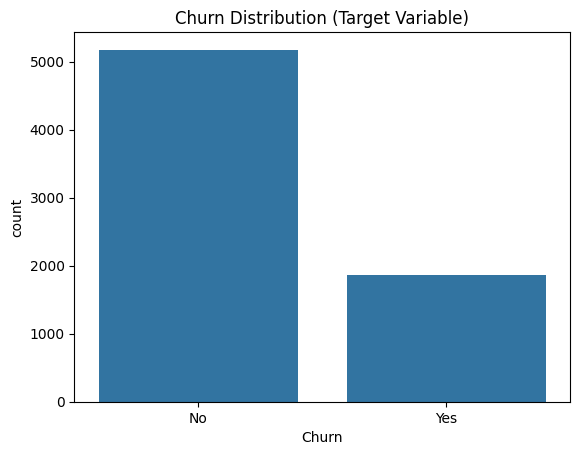


Churn Value Counts:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [9]:
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution (Target Variable)')
plt.show()
print("\nChurn Value Counts:\n", df['Churn'].value_counts(normalize=True))
# Note: Potential class imbalance exists.

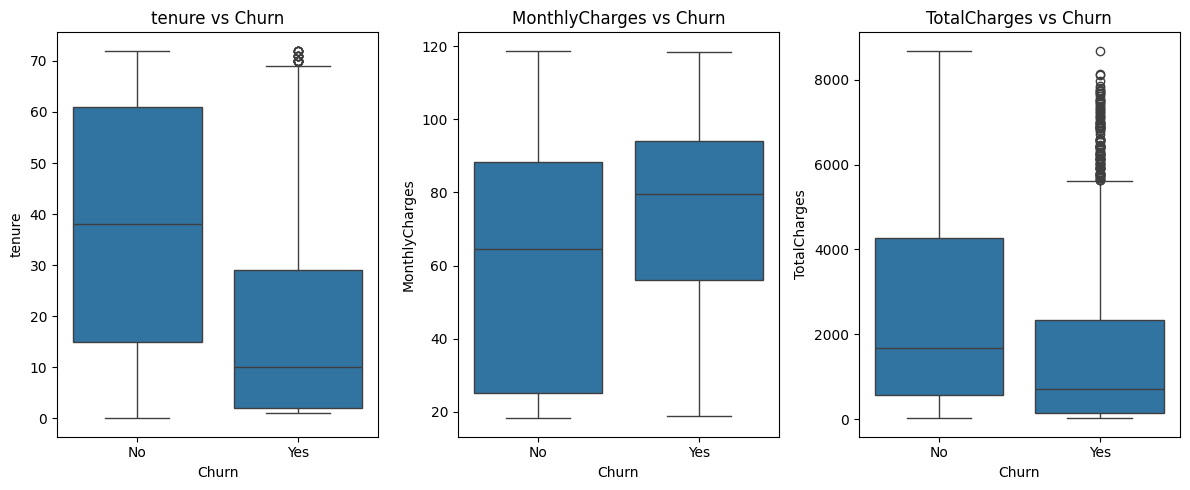

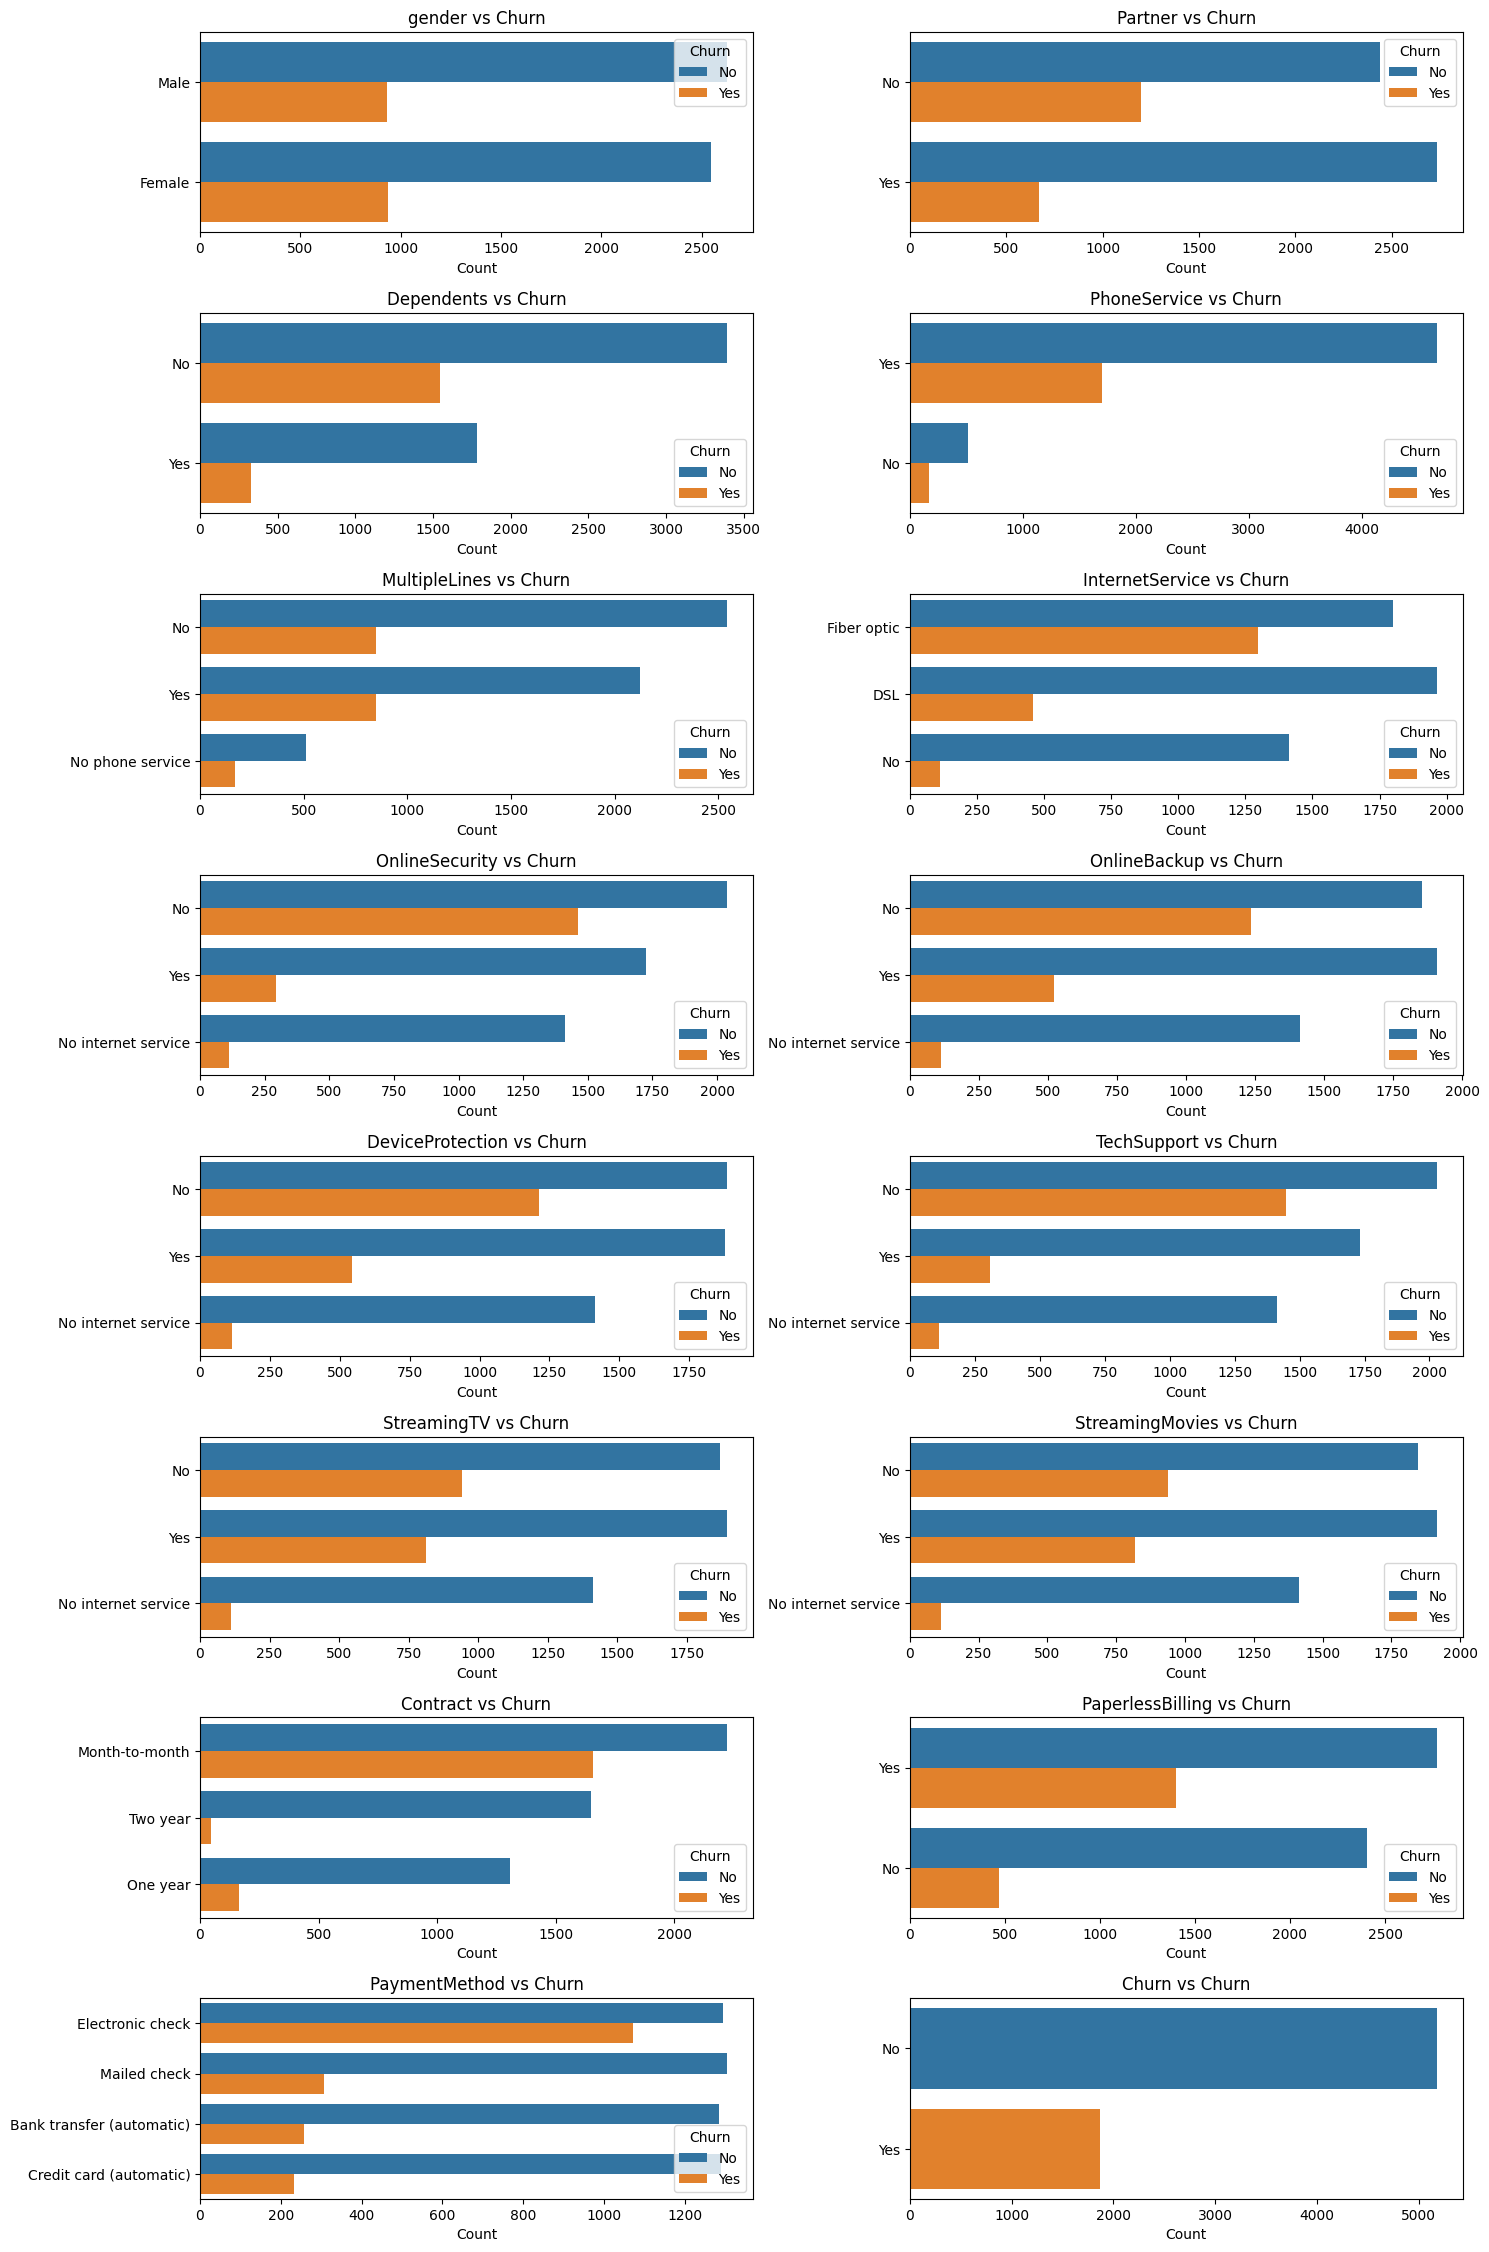

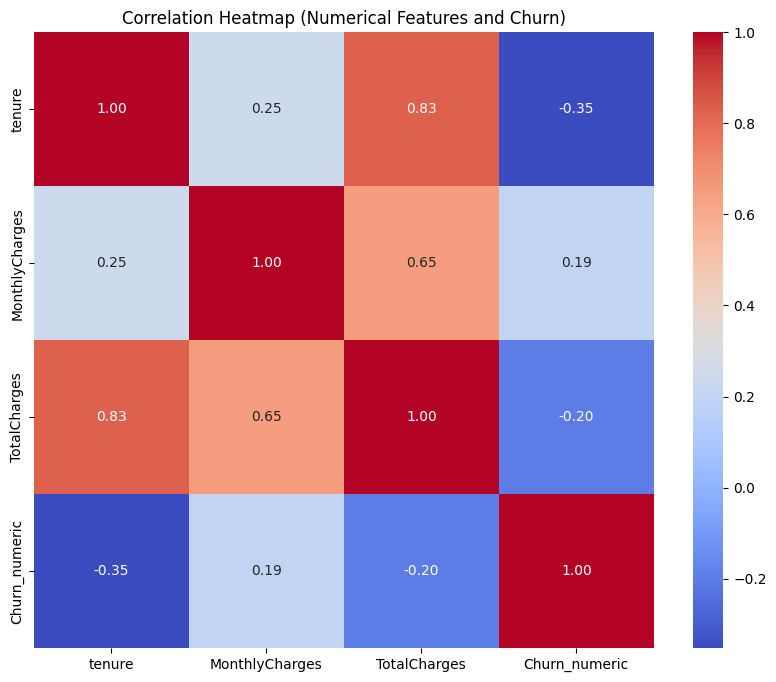

In [10]:
# Numerical features vs. Churn
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

# Categorical features vs. Churn
plt.figure(figsize=(15, 25)) # Adjust figsize
for i, col in enumerate(categorical_features):
     plt.subplot(len(categorical_features)//2 + 1, 2, i+1)
     sns.countplot(data=df, y=col, hue='Churn', order=df[col].value_counts().index)
     plt.title(f'{col} vs Churn')
     plt.xlabel('Count')
     plt.ylabel('')
plt.tight_layout()
plt.show()

# Correlation Heatmap (only numerical features after encoding)
# We'll do this properly after preprocessing, but can get an initial idea
# Convert Churn to numeric for correlation calc
df_corr = df.copy()
df_corr['Churn_numeric'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr[numerical_features + ['Churn_numeric']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features and Churn)')
plt.show()

In [11]:
# Option 1: Impute with 0 for 0 tenure (if applicable)
# df['TotalCharges'] = df.apply(lambda row: 0 if row['tenure'] == 0 else row['TotalCharges'], axis=1)
# Option 2: Impute remaining NaNs (if any) or all NaNs with median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)
print("\nMissing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\phili\AppData\Local\Temp\ipykernel_18684\4251890234.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


In [12]:
df.drop('customerID', axis=1, inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Convert Churn to numeric
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [18]:
bins = [0, 12, 24, 36, 48, 60, 100] # 0-1yr, 1-2yr, ..., 5+yr
labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False, include_lowest=True)
print("Created 'TenureGroup' feature.")
# print(df[['tenure', 'TenureGroup']].head())

# Idea 2: NumOptionalServices (Count of Add-on Services)
optional_service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
# Convert 'Yes' to 1, others ('No', 'No internet service') to 0 FOR COUNTING
for col in optional_service_cols:
    df[col + '_numeric'] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0}) # Create temp numeric cols for sum

df['NumOptionalServices'] = df[[col + '_numeric' for col in optional_service_cols]].sum(axis=1)
df.drop([col + '_numeric' for col in optional_service_cols], axis=1, inplace=True) # Drop temporary numeric cols
print("Created 'NumOptionalServices' feature.")
# print(df[optional_service_cols + ['NumOptionalServices']].head())

# Idea 3: PaymentMethodType (Simplify Payment Method)
payment_map_simple = {
    'Bank transfer (automatic)': 'Automatic',
    'Credit card (automatic)': 'Automatic',
    'Mailed check': 'Manual',
    'Electronic check': 'Manual' # Grouping e-check with manual
}
df['PaymentMethodType'] = df['PaymentMethod'].map(payment_map_simple)
print("Created 'PaymentMethodType' feature.")
# print(df[['PaymentMethod', 'PaymentMethodType']].head())

# Drop original columns that have been replaced or simplified IF desired
# We will drop PaymentMethod later during encoding, Tenure could be kept or dropped
# df.drop('PaymentMethod', axis=1, inplace=True) # Drop original PaymentMethod
# df.drop('tenure', axis=1, inplace=True) # Optional: Drop original tenure if TenureGroup is sufficient

print("\nDataFrame shape after Feature Engineering:", df.shape)
print("Columns:", df.columns)

Created 'TenureGroup' feature.
Created 'NumOptionalServices' feature.
Created 'PaymentMethodType' feature.

DataFrame shape after Feature Engineering: (7043, 23)
Columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TenureGroup',
       'NumOptionalServices', 'PaymentMethodType'],
      dtype='object')


In [19]:

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Identify column types AFTER feature engineering
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
# Add NumOptionalServices if it wasn't picked up automatically (it should be)
if 'NumOptionalServices' not in numerical_cols: numerical_cols.append('NumOptionalServices')
# Remove tenure if we decided to drop it (we kept it for now)
# if 'tenure' not in X.columns and 'tenure' in numerical_cols: numerical_cols.remove('tenure')

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
# Add TenureGroup and PaymentMethodType if they weren't picked up as category type
if 'TenureGroup' in X.columns and 'TenureGroup' not in categorical_cols: categorical_cols.append('TenureGroup')
if 'PaymentMethodType' in X.columns and 'PaymentMethodType' not in categorical_cols: categorical_cols.append('PaymentMethodType')

# Remove original columns that were replaced by engineered features from the list for encoding
if 'PaymentMethod' in categorical_cols: categorical_cols.remove('PaymentMethod')
# Ensure only columns actually present in X are listed
numerical_cols = [col for col in numerical_cols if col in X.columns]
categorical_cols = [col for col in categorical_cols if col in X.columns]

print("\nNumerical columns identified for scaling:", numerical_cols)
print("Categorical columns identified for encoding:", categorical_cols)


Numerical columns identified for scaling: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'NumOptionalServices']
Categorical columns identified for encoding: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'TenureGroup', 'PaymentMethodType']


In [20]:
# Drop the original replaced column before encoding
if 'PaymentMethod' in X.columns:
    X.drop('PaymentMethod', axis=1, inplace=True)
    print("Dropped original 'PaymentMethod' column before encoding.")

# Apply One-Hot Encoding to categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(f"\nShape after One-Hot Encoding: {X.shape}")
print("Columns after encoding:", X.columns.tolist()) # Show some example columns

# Split data into training and testing sets (BEFORE scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split into train/test: Train={X_train.shape}, Test={X_test.shape}")

# Scale numerical features (Fit on train, transform train and test)
# Ensure only numerical columns present in the final X are scaled
final_numerical_cols = [col for col in numerical_cols if col in X_train.columns]
print("\nFinal Numerical columns to be scaled:", final_numerical_cols)

Dropped original 'PaymentMethod' column before encoding.

Shape after One-Hot Encoding: (7043, 34)
Columns after encoding: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'NumOptionalServices', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'TenureGroup_1-2 Years', 'TenureGroup_2-3 Years', 'TenureGroup_3-4 Years', 'TenureGroup_4-5 Years', 'TenureGroup_5+ Years', 'PaymentMethodType_Manual']

Data split into train/test: Train=(5634, 34), T